Assigment 1

I want you to use 3 different feature scale methods separately. write a function for this and return the X_scaled variable. Compare the mean squared error results from the 3 methods and report your results. It would be better if you change the code completely into functions (function for cost calculation etc.).


Mean Squared Error (Mean Normalization): 0.8110670689820058
Mean Squared Error (Min-Max Scaling): 461.8905818934917
Mean Squared Error (Z-Score Standardization): 0.8110670689820058


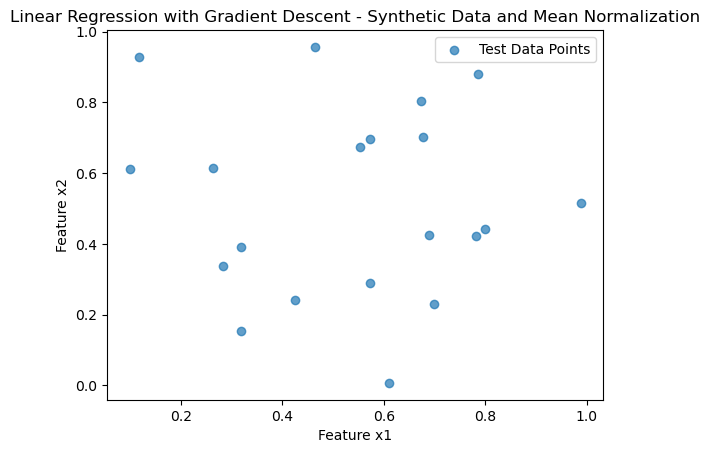

Learned Coefficients (Weights):
[[664.90298743]
 [947.21978952]]
Bias (Intercept): 1599.9096765117727


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic data with different feature scales
np.random.seed(0)

# Daily temperature (feature x1) with a range of [20, 40] degrees Celsius
temperature = 20 + 20 * np.random.rand(100, 1)

# Ice cream sales (feature x2) with a range of [0, 200] units
ice_cream_sales = 200 * np.random.rand(100, 1)

# Combine temperature and ice cream sales into a single feature matrix X
X = np.hstack((temperature, ice_cream_sales))

# Daily profit (target variable y)
# Assume that daily profit depends on the temperature, ice cream sales,
# and some random noise (normal distribution)
daily_profit = 1000 + 30 * temperature + 5 * ice_cream_sales + np.random.randn(100, 1)

# Now, you have synthetic data to analyze and build a predictive model for daily profit based on temperature and ice cream sales.

# Perform mean normalization (standardization) on input features

#!!! create a function and scale our X and return X_scaled
#!!! do this for whole method like max, mean and z-score 
#!!! compare the result

# Define a function to perform mean normalization
def mean_normalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

# Define a function to perform min-max scaling
def min_max_scaling(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    X_scaled = (X - min_val) / (max_val - min_val)
    return X_scaled

# Define a function to perform z-score standardization
def z_score_standardization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized


# Split the data into training and testing sets

# Scale the data using the three methods
X_mean_normalized = mean_normalization(X)
X_min_max_scaled = min_max_scaling(X)
X_z_score_standardized = z_score_standardization(X)

# Split the data into training and testing sets for each scaled dataset
X_train_mean, X_test_mean, y_train, y_test = train_test_split(X_mean_normalized, daily_profit, test_size=0.2, random_state=42)
X_train, X_test , _, _ = train_test_split(X_min_max_scaled, daily_profit, test_size=0.2, random_state=42)
X_train_z_score, X_test_z_score, _, _ = train_test_split(X_z_score_standardized, daily_profit, test_size=0.2, random_state=42)


# Function for gradient descent
def gradient_descent(X_train, y_train, alpha, num_iterations):
    m, n = X_train.shape
    w = np.zeros((n, 1))
    b = 0

    for iteration in range(num_iterations):
        y_pred = np.dot(X_train, w) + b
        w_gradient = (1 / m) * np.dot(X_train.T, (y_pred - y_train))
        b_gradient = (1 / m) * np.sum(y_pred - y_train)
        w -= alpha * w_gradient
        b -= alpha * b_gradient

    return w, b

# Function to calculate Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# Perform gradient descent and calculate MSE for each scaled dataset
alpha = 0.01
num_iterations = 1000

w_mean, b_mean = gradient_descent(X_train_mean, y_train, alpha, num_iterations)
y_pred_mean = np.dot(X_test_mean, w_mean) + b_mean
mse_mean = mean_squared_error(y_test, y_pred_mean)

w_min_max, b_min_max = gradient_descent(X_train, y_train, alpha, num_iterations)
y_pred_min_max = np.dot(X_test, w_min_max) + b_min_max
mse_min_max = mean_squared_error(y_test, y_pred_min_max)

w_z_score, b_z_score = gradient_descent(X_train_z_score, y_train, alpha, num_iterations)
y_pred_z_score = np.dot(X_test_z_score, w_z_score) + b_z_score
mse_z_score = mean_squared_error(y_test, y_pred_z_score)


# Print the Mean Squared Error for each scaling method
print("Mean Squared Error (Mean Normalization):", mse_mean)
print("Mean Squared Error (Min-Max Scaling):", mse_min_max)
print("Mean Squared Error (Z-Score Standardization):", mse_z_score)

# Plot one feature (e.g., x1) against y_test
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data Points', alpha=0.7)

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.title('Linear Regression with Gradient Descent - Synthetic Data and Mean Normalization')
plt.show()
# Print the learned coefficients
print("Learned Coefficients (Weights):")
print(w)
print("Bias (Intercept):", b)